<a href="https://colab.research.google.com/github/Yevheniia-Ilchenko/ML_DS_tasks/blob/main/HW_2_1_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B8_%D0%BB%D1%96%D0%BD%D1%96%D0%B8%CC%86%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Постановка задачі

Компанія ACME Insurance Inc. пропонує доступне медичне страхування тисячам клієнтів по всіх Сполучених Штатах. Як головний дата-сайєнтіст в ACME, **вам доручено створити автоматизовану систему для оцінки річних медичних зборів для нових клієнтів**, використовуючи інформацію, таку як їх вік, стать, ІМТ ([індекс маси тіла](https://en.wikipedia.org/wiki/Body_mass_index)), наявність дітей, звички щодо куріння та регіон проживання.

Оцінки з вашої системи будуть використовуватися для визначення річної страхової плати (сума, що сплачується щомісяця) пропонованої клієнту. Через регулятивні вимоги, ви повинні мати змогу пояснити, чому ваша система видає певний прогноз.

Вам надано CSV файл `medical-charges.csv`, що містить перевірені історичні дані, які складаються з вищезгаданої інформації та фактичних медичних зборів, здійснених понад 1300 клієнтами.

<img src="https://i.imgur.com/87Uw0aG.png" width="480">

Джерело набору даних: https://github.com/stedy/Machine-Learning-with-R-datasets


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [7]:
import pandas as pd

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
medical_df = pd.read_csv('/content/drive/MyDrive/Data/medical-charges.csv')

In [10]:
medical_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Можна після перевірки/заповненя/підготовки данних проаналізувати  та зробити візуалізацію колонок і виявити зв'язки між змінними (вік, стать, ІМТ, куріння, діти, регіон) та медичними зборами.

- Можливо ми прийдемо до висновків які клієнти більш ризикові як **по певним правилам** (по віку: від 20 до 30 - стандарт, від 30 до  40 +10%,старші 40 років +20%, курять чи не курять, по кількості дітей так само) і яким треба ставити більшу оплатую умовно на n%, описати ці умови і якщо клієнт підходить під цю умову збільшувати оплату на прорахований %.

- Або відразу іх **розділити на кластери** по цим характеристикам і подивитися залежніть та кореляцію між групами та charges та вирішити яка буде різниця в оплаті по кожній групі.

- Ще можна порахувати **середній charges на кожний унікальний набір характеристик**який зустрічається і вивести такий варіант по аплатам(але скоріше за все буде дуже багато варіантів)





**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [11]:
!pip install plotly matplotlib seaborn --quiet

In [12]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [13]:
fig_sex = px.histogram(medical_df, x="charges", marginal='box', color="sex", color_discrete_sequence=["red", "blue"],
                   title="Medical Charges Sex")
fig_sex.update_layout(bargap=0.1)
fig_sex.show()

**Спостереження**:

Помітна різниця між 75 перцентилем жінок - 14,45 і чоловіків - 19, що показує що 75% данних по чоловікам знаходяться в більшому діапазоні charges в порівнянні з жінками, і ще більшою різницею є chsrges 100 перцентиля у жінок - 28.92 і у чоловіків - 40.72 що знову підтверджує що чоловіки платять більші суми після медіани так як її показник у цих двох категоріях приблизно однаковий.

З цікавого помітно що к-ть чоловіків в діапазоні оплати з 0 до 12к трамається на одному рівні - біля 70 клієнтів на кожен bin, а ось у жінок пікове значення по кількості в оплаті 2-4к,а потім помітно зменшується к-ть з ростом оплати.

Виходячи з цього графіка я б не ставила різні ціна на чоловіків та жінок виходячи тільки з гендеру


In [14]:
fig_reg = px.histogram(medical_df, x="charges", marginal="box", color="region",color_discrete_sequence=["red", "blue", "green","yellow"],
                   title="Medical Charges Region" )
fig_reg.update_layout(bargap=0.1)
fig_reg.show()

**Спостереження:**

На графіку помітно що найбільша медіана у northeast - 10.05, в порівнянні з northwest - 8.97 та southwest - 8,798 і southeast- 9.294. Тож регіон впливає на медіану charges клієнтів. Значення southeast має великий діапазон charges після медіани в порівнянні з іншими регіонами.

Також помітні пікові(найбільші кількості клієнтів) в різних регіонах на різних бінах:

northeast- 2-4к
northwest -2-4к
southwest - 2-12к майже рівномірно розділені
southeast - 4-6к

Що показує де найбільші концентрації клієнтів по цінам в розрізі регіонів

Я вважаю що ціна на charges повинна залежити від регіону проживання

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [15]:
fig_3 = px.histogram(medical_df, x="region", color="smoker",color_discrete_sequence=["red", "blue"],title="Smoker Region"  )
fig_3.update_layout(bargap=0.1)
fig_3.show()

**Спостереження:**

southeast - має найбільшу частину клієнтів які курять

northeast - другий по кількості клієнтів які курять і останні два регіони на одному рівні

In [16]:
fig_4 = px.histogram(medical_df, x="children", color="smoker",color_discrete_sequence=["red", "blue"],title="children Region"  )
fig_4.update_layout(bargap=0.1)
fig_4.show()

Найбільша частина клієнтів не мають дітей взагалі, і з ростом кількості дітей к-ть клієнтів зменшується.

Кількіть клієнтів які палять найбільша серед тих в кого немає дітей, в яких 1-2 дитини курять майже однакова кількість, але коли 5 дітей то клієнти майже не курять.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [17]:
fig_5 = px.violin(medical_df, x="charges",color ="children",  points="all", box=True, title="Charges and children")
fig_5.update_layout(
    height=900,
    width=1200)
fig_5.show()

Спостереження:


Найбільше діапазон по charges це клієнти без дітей, найменший в клієнтів з 5ма дітьми.

Найбільша медіана по charges в клієнтів в яких 4ро дітей  - 11.03

Найменша у клієнтів з однією дитиною - 8.48

Помітно що групи клієнтів 0-1 дітей charges починаються з більш низьких показників - 1.1-1.7, група 2-3 дитини стартові charges вже вищі майже в два рази - 2.5-3.5  і у групі 4-5 дітей  - початок з 4,5к

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [18]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [23]:
def estimate_charges(age, w, b):
    return w * age + b

In [20]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=1);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

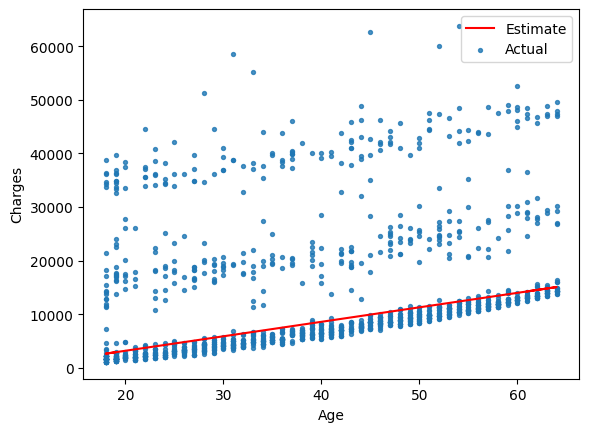

In [78]:
try_parameters(medical_df, 270, -2200)

Спостереження:

при збільшенні w, треба коригувати початок лінії значенням b.

лінія лише приблизно описує розміщення даних на осях

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [50]:
import numpy as np

def rmse(target, predictions):
  return np.sqrt(np.mean(np.square(target - predictions)))


In [76]:
w = 270
b = -2200


target = non_smoker_df.charges
predictions = estimate_charges(non_smoker_df.age, w, b)

In [77]:
rmse(target, predictions)

4662.666599217586

In [34]:
medical_df.charges.describe()

,charges
count,1338.000000
mean,13270.422265
std,12110.011237
min,1121.873900
25%,4740.287150
50%,9382.033000
75%,16639.912515
max,63770.428010


**Стратегія щодо покращення значень:**

Спочатку я б максимально поклала лінію на данні які мають "форму" сгрупувань як лінія або дуже схожу, і потім виміром rmse підганяла найменше значення змінюючи ваги w and b.